# Chapter 8: Tree Based Methods
+ The prediction space are stratified or segmented into several regions.
+ Mean or the mode of the training observations in the region to which it belongs usually being used for prediction.
+ Decision trees are simple and easy to interpret.
+ However, it's not as good as other supervised learning discussed previously.
+ Bagging, random forests and boosting will produce mutiple trees which could improved the prediction accuracy.



In [18]:
import os
os.chdir('D:/01. Education/02. Master/Semester 2/Machine-Learning')
os.getcwd()

'D:\\01. Education\\02. Master\\Semester 2\\Machine-Learning'

In [19]:
from IPython.display import Image
Image('images/pw81.png', width =700)

FileNotFoundError: No such file or directory: 'images/pw81.png'

FileNotFoundError: No such file or directory: 'images/pw81.png'

<IPython.core.display.Image object>

In [20]:
Image('images/pw82.png', width =700)

FileNotFoundError: No such file or directory: 'images/pw82.png'

FileNotFoundError: No such file or directory: 'images/pw82.png'

<IPython.core.display.Image object>


## Decision Trees
+ Can be applied to both regression and classification. 
+ Decision trees are graphics where you can start at the "root" and traverse your way down by making decisions at the "branches" before finally ending up at a "leaf" that gives you the prediction. 
+ It usually drawn upside down (leaves at the bottom)

![tree image](http://image.slidesharecdn.com/decisiontree-151015165353-lva1-app6892/95/classification-using-decision-tree-12-638.jpg?cb=1444928106)

+ **terminal node** - the regions or leaves of the tree. (3 terminal nodes)
+ **internal node** - the points along the tree where the predictor space is split. (2 internal nodes)
+ **branches** - the segments of the trees that connect the nodes.
+ Explanation for the example:
    + *Years* of experienced is the most important factor in determining *Salary*.
    + For experienced players, the number of *Hits* effect the *Salary*.
    
+ Two general steps for building a (regression) decision tree (Stratification)
1. Divide the predictor space into j number of regions
2. For each region, find the mean response and use it as the predicted value. This will minimize the squared error for that region.

+ The regions in theory can be divided in any crazy manner you choose but in practice, they are divided into high dimensional rectangles. 
+ For example, you could have used a line with a non-zero slope to partition the region below to get a more accurate fit, but simplicity wins here and we just split on horizontal and vertical lines - "high dimensional rectangles".


### How do we get the branches?
+ We could try and just build every single tree imaginable and find the tree with the lowest squared error but this is computationally infeasible even for a relatively small number of predictors. 
+ Instead, a greedy approach is used by building the tree one branch at a time. 
+ The first branch is constructed by testing out many different binary splits of the data. 

+ For example, $X_1 < 5$ and  $X_1 >= 5$ would be one potential split. 
+ $X_2 = YES$ and  $X_2 = NO$ could be another binary split. 
+ Whichever split yields the lowest squared error would be considered the best split and that split would be chosen for the first branch. 
+ This process now continues for each branch interactively until some stopping criteria is met (maximum number of branches, minimum number of observations in a certain branch, etc...).



In [21]:
Image('images/pw83.png', width =700)

FileNotFoundError: No such file or directory: 'images/pw83.png'

FileNotFoundError: No such file or directory: 'images/pw83.png'

<IPython.core.display.Image object>

### Tree Pruning
+ It is possible to build a decision tree so specific (one with so many branches) that each observation can be predicted exactly. 
+ This would be complete memorization, ie overfitting, of the data. 
+ Because we want to have the tree work with unseen data, we can prune the tree.

+ One strategy would be some have some threshold for stopping a branch from splitting - it must have decreased RSS by a certain amount. 
+ Since this might miss a good split deeper in the tree, pruning is preferred.

Pruning works by: 
+ growing a very large tree, $T_0$, and prune it back to obtain a subtree.
+ Goal is to select a subtree that leads to the lowest test error rate.
+ Use CV to select the best subtree.

Cost complexity pruning (weakest link pruning):
1. Use recursive binary splitting to grow a large tree on the training data, stopping only when a minimum number of observations are left in each terminal node.
2. At each stage during the growing process add a penalty term $\alpha|T|$ to RSS where |T| is the number of terminal nodes and $\alpha$ is the tuning parameter.
3. This will give a function that maps $\alpha$ to a particular subtree. So $\alpha = 0$ would map to the original huge tree and for example $\alpha = 5$ could map to a tree that with only half of the terminal nodes.
4. For each value of $\alpha$ there corresponds a subtree $T \subset T_0$ such that
$$ \sum_{m=1}^{|T|}\sum_{i: x_i \in R_m}{(y_i - \widehat{y}_{R_m})^2 + \alpha |T|}$$
is as small as possible.
    + $|T|$ - no. of terminal nodes
    + $R_m$ - rectangle corresponding to the $m$th terminal node

Choose $\alpha$ through cross validation by:
1. Splitting training data into K folds
2. Grow a large tree and apply the penalty term exactly as above (map each $\alpha$ to a particular subtree.)
3. evaluate each $\alpha$ (subtree) on the left-out fold
4. Average all the $\alpha$ (subtrees) for each iteration of the K-folds

Then use this $\alpha$ to choose the tree from above.




In [22]:
Image('images/pw84.png', width =600)

FileNotFoundError: No such file or directory: 'images/pw84.png'

FileNotFoundError: No such file or directory: 'images/pw84.png'

<IPython.core.display.Image object>

In [23]:
Image('images/pw85.png', width =500)

FileNotFoundError: No such file or directory: 'images/pw85.png'

FileNotFoundError: No such file or directory: 'images/pw85.png'

<IPython.core.display.Image object>

### Classification Trees
+ Predict that each observation belongs to the most commonly occurring class of training observations in the region to which it belongs.
+ Interested not only in the class prediction corresponding to a particular terminal node region, but also in the class proportions among the training observations that fall into that region.
+ RSS cannot be used as a criterion for making the binary splits.

#### How to determine splits
+ Three different metrics can be used. 
+ First let $\hat{p}_{mk}$ be the proportion of region m with class k. 
+ Remember that there can be many classes not just 2.
1. Classification error rate: $$E = 1 - \max_k(\hat{p}_{mk})$$ 
where $\max_k(\hat{p}_{mk})$ is the most common class.
2. Gini Index: $$G = \sum\limits_{k=1}^{K}\hat{p}_{mk}(1 - \hat{p}_{mk})$$
Gini index is referred to as a measure of node purity — a small value indicates that a node contains predominantly
observations from a single class.
3. Cross Entropy: $$D = - \sum\limits_{k=1}^{K}\hat{p}_{mk}\log\hat{p}_{mk}$$

+ Cross entropy and Gini are similar in that it will yield low scores if all of the $\hat{p}_{mk}$ close to 0 or 1. 
+ Gini and Cross entropy take into account each class proportion while classification error rate only takes into account the highest occurring class
+ Both are more sensitive to node purity.
+ Classification error rate is preferable if prediction accuracy is the goal.


### Linear Model vs Trees
+ If the decision boundary is linear and not rectangular then linear models can perform better than trees.
+ But for highly non-linear decision boundaries then trees can perform better.
+ Advantages of trees:
    + Trees are very easy to explain
    + more closely mirror human decision-making
    + can be displayed graphically, therefore easily interpreted
    + can easily handle qualitative predictors without the need to create dummy variables.
+ Disadvantages of trees
    + level of prediction accuracy are lower
    + trees can be very non-robust. A small change in the data can cause a large change in the final estimated tree.

In [24]:
Image('images/pw86.png', width =800)

FileNotFoundError: No such file or directory: 'images/pw86.png'

FileNotFoundError: No such file or directory: 'images/pw86.png'

<IPython.core.display.Image object>

In [25]:
Image('images/pw87.png', width =600)

FileNotFoundError: No such file or directory: 'images/pw87.png'

FileNotFoundError: No such file or directory: 'images/pw87.png'

<IPython.core.display.Image object>

### Lab
Need to install graphviz to create the decision tree

Download here:
https://graphviz.gitlab.io/_pages/Download/Download_windows.html

In [26]:
!pip install graphviz

In [27]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files/Graphviz/bin/'

In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import graphviz

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

### Lab: Classification Trees
We'll start by using **classification trees** to analyze the `Carseats` data set. In these
data, `Sales` is a continuous variable, and so we begin by converting it to a
binary variable. We use the `ifelse()` function to create a variable, called
`High`, which takes on a value of `Yes` if the `Sales` variable exceeds 8, and
takes on a value of `No` otherwise. We'll append this onto our dataFrame using the `.map()` function, and then do a little data cleaning to tidy things up:

In [29]:
df3 = pd.read_csv('data/carseats.csv')
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [30]:
df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0)
df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]
df3.Urban = df3.Urban.map({'No':0, 'Yes':1})
df3.US = df3.US.map({'No':0, 'Yes':1})
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In order to properly evaluate the performance of a classification tree on
the data, we must estimate the test error rather than simply computing
the training error. We first split the observations into a training set and a test
set:

In [31]:
X = df3.drop(['Sales', 'High'], axis = 1)
y = df3.High

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

We now use the DecisionTreeClassifier() function to fit a classification tree in order to predict High. Unfortunately, manual pruning is not implemented in sklearn: http://scikit-learn.org/stable/modules/tree.html

However, we can limit the depth of a tree using the max_depth parameter:

In [32]:
classification_tree_carseats = DecisionTreeClassifier(max_depth = 6)
classification_tree_carseats.fit(X_train, y_train)
classification_tree_carseats.score(X_train, y_train)

0.921875

We see that the training accuracy is 92.2%.

One of the most attractive properties of trees is that they can be
graphically displayed. Unfortunately, this is a bit of a roundabout process in `sklearn`. We use the `export_graphviz()` function to export the tree structure to a temporary `.dot` file,
and the `graphviz.Source()` function to display the image:

In [34]:
export_graphviz(classification_tree_carseats, 
                out_file = "carseat_tree.dot", 
                feature_names = X_train.columns)

with open("carseat_tree.dot") as f:
    dot_graph = f.read()
#graphviz.Source(dot_graph)

In [35]:
from subprocess import check_call
check_call(['dot','-Tpng','carseat_tree.dot','-o','carseat_tree.png'])

0

In [36]:
y_train.value_counts()

High
0    193
1    127
Name: count, dtype: int64

In [37]:
X_train.Price[X_train.Price<=92.5].shape

(48,)

+ True(Left) or False(Right) based on the conditions in the previous node 
+ gini is the measure of impurity
+ samples are the number of observations remaining to classify
+ value is how many samples are in class 0(Low) and how many samples are in class 1(High)

The most important indicator of High sales appears to be Price.

Finally, let's evaluate the tree's performance on
the test data. The `predict()` function can be used for this purpose. We can then build a confusion matrix, which shows that we are making correct predictions for
around 72.5% of the test data set:

In [38]:
pred = classification_tree_carseats.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, 
                  index = ['No', 'Yes'], 
                  columns = ['No', 'Yes'])
print(cm)
# (36+22)/80 = 0.745

     No  Yes
No   36   15
Yes   7   22


### Lab: Regression Trees
Now let's try fitting a regression tree to the Boston data set. First, we create a training set, and fit the tree to the training data using medv (median home value) as our response:

In [39]:
boston_df = pd.read_csv('data/boston.csv')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [40]:
X = boston_df.drop('medv', axis = 1)
y = boston_df.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

# Pruning not supported. Choosing max depth 2)
regr_tree_boston = DecisionTreeRegressor(max_depth = 2)
regr_tree_boston.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [42]:
export_graphviz(regr_tree_boston, 
                out_file = "boston_tree.dot", 
                feature_names = X_train.columns)

with open("boston_tree.dot") as f:
    dot_graph = f.read()
# graphviz.Source(dot_graph)

The variable `lstat` measures the percentage of individuals with lower
socioeconomic status. The tree indicates that lower values of `lstat` correspond
to more expensive houses. The tree predicts a median house price
of \$45,766 for larger homes (`rm>=7.4351`) in suburbs in which residents have high socioeconomic
status (`lstat<7.81`).

Now let's see how it does on the test data:

35.406215828790266

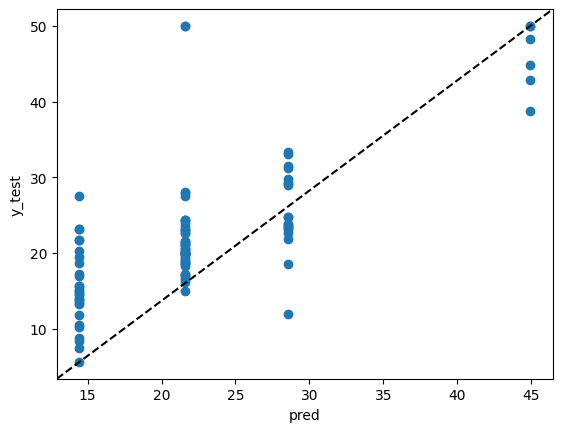

In [43]:
pred = regr_tree_boston.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'medv')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

The test set MSE associated with the regression tree is
35.4. The square root of the MSE is therefore around 5.95, indicating
that this model leads to test predictions that are within around \$5,950 of
the true median home value for the suburb.


## Bagging
+ Decison trees suffer from high variance.
+ Bootstrap aggregation - a procedure for lowering variance of decision trees.
    + Bootstrapping - taking repeated samples with replacement and using each sample as an input into a learning method  
    + Aggregation - For Regression, average each prediction from each of these bootstrapped data sets. 
$$\hat{f}_{\textrm{bag}}(x) = \frac{1}{B}\sum_{b=1}^B{\hat{f}^{*b}(x)}$$
    + For classification, use majority vote, the most commonly occurring class among the B predictions.


### Validation with Out-of-bag error
+ Each bootstrap sample will contain on average 2/3 of the data points (because of sampling with replacement). 
+ We can use the left over 1/3 as validation set and record errors for each point not in the sample.
+ The resulting OOB error is a valid estimate of the test error for the bagged model, since the response for each observation is predicted using only the trees that were not fit using that observation.
+ With B sufficiently large, OOB error is virtually equivalent to leave-one-out cross-validation error.

### Variable Importance
+ The wonderful thing about decision trees is their ease of interpretability. 
+ Bagging reduces this tremendously since we are averaging decisions together. 
+ We can use the average amount of decrease in RSS/Gini-index that happens for each time a split happens with a particular predictor. 
+ Generally, those predictors that are used higher up in the trees will cause a more massive decrease in RSS/Gini-index



In [ ]:
Image('images/pw88.png', width =700)

In [ ]:
Image('images/pw89.png', width =600)

## Random Forests

+ Random Forests combine bagging with one additional feature - and that is to limit the features to split on at each node.
+ Instead of being able to split the data on any feature, only a subset of the features are considered at each stage. 
+ A typical choice is the square root of the number of predictors, $m \approx \sqrt{p}$. 
+ This ensures that the trees will look quite different and not nearly as correlated as bagged trees would be. 
+ This also makes the trees significantly 'dumber' as they can only split on whatever random predictors it gets.
+ This process decorrelate the trees, thereby making the average of the resulting trees less variable and hence more reliable.
+ Refer Fig. 8.8


In [ ]:
Image('images/pw810.png', width =700)

### Lab: Bagging and Random Forests

Let's see if we can improve on this result using **bagging** and **random forests**. The exact results obtained in this section may
depend on the version of `python` and the version of the `RandomForestRegressor` package
installed on your computer, so don't stress out if you don't match up exactly with the book. Recall that **bagging** is simply a special case of
a **random forest** with $m = p$. Therefore, the `RandomForestRegressor()` function can
be used to perform both random forests and bagging. Let's start with bagging:

In [44]:
# Bagging: using all features
bagged_boston = RandomForestRegressor(max_features = 13, random_state = 2)
bagged_boston.fit(X_train, y_train)

RandomForestRegressor(max_features=13, random_state=2)

The argument `max_features = 13` indicates that all 13 predictors should be considered
for each split of the tree -- in other words, that bagging should be done. How
well does this bagged model perform on the test set?

19.22984042156864

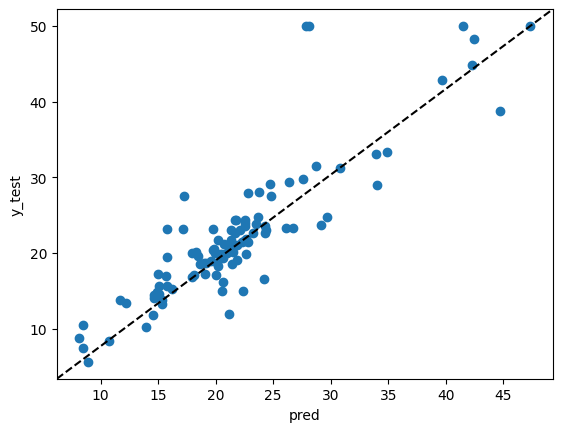

In [45]:
pred = bagged_boston.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'medv')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

The test set MSE associated with the bagged regression tree is significantly lower than our single tree!

We can grow a random forest in exactly the same way, except that
we'll use a smaller value of the `max_features` argument. Here we'll
use `max_features = 6`:

In [49]:
# Random forests: using 6 features
random_forest_boston = RandomForestRegressor(max_features = 4, random_state = 1)

random_forest_boston.fit(X_train, y_train)

pred = random_forest_boston.predict(X_test)
mean_squared_error(y_test, pred)

24.457136656862748

The test set MSE is even lower; this indicates that random forests yielded an
improvement over bagging in this case.

Using the `feature_importances_` attribute of the `RandomForestRegressor`, we can view the importance of each
variable:

In [52]:
print(random_forest_boston.feature_importances_)
print('===========================')
print(X.columns)

[0.0625197  0.00455131 0.09095176 0.00446711 0.05345483 0.27050304
 0.02648594 0.05353894 0.00989396 0.02635227 0.07287523 0.01748788
 0.30691803]
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')


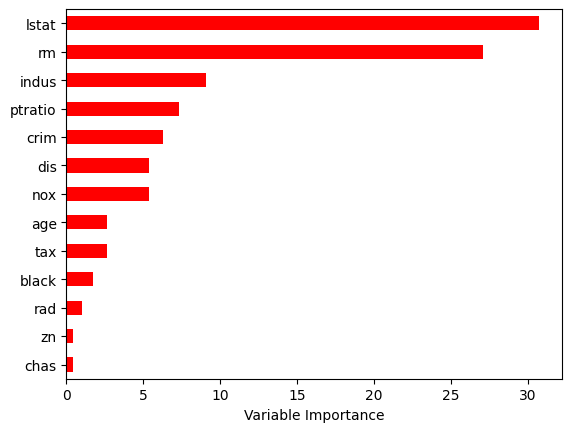

In [53]:
Importance = pd.DataFrame({'Importance':random_forest_boston.feature_importances_*100}, 
                          index = X.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

The results indicate that across all of the trees considered in the random
forest, the wealth level of the community (`lstat`) and the house size (`rm`)
are by far the two most important variables.

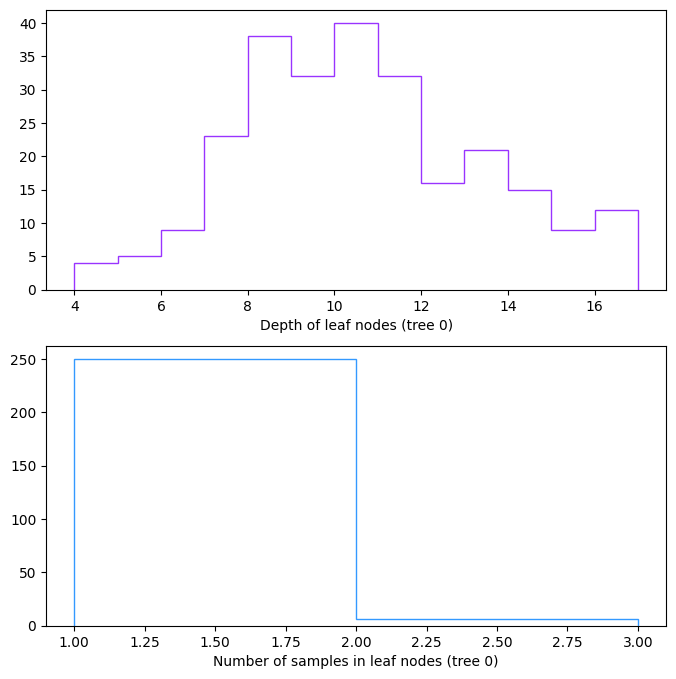

In [55]:
from sklearn.tree import _tree

def leaf_depths(tree, node_id = 0):
    
     '''
     tree.children_left and tree.children_right store ids
     of left and right chidren of a given node
     '''
     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     '''
     If a given node is terminal, 
     both left and right children are set to _tree.TREE_LEAF
     '''
     if left_child == _tree.TREE_LEAF:
         
         '''
         Set depth of terminal nodes to 0
         '''
         depths = np.array([0])

     else:
         
         '''
         Get depths of left and right children and
         increment them by 1
         '''
         left_depths = leaf_depths(tree, left_child) + 1
         right_depths = leaf_depths(tree, right_child) + 1
 
         depths = np.append(left_depths, right_depths)
 
     return depths

def leaf_samples(tree, node_id = 0):
    
     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     if left_child == _tree.TREE_LEAF:
        
         samples = np.array([tree.n_node_samples[node_id]])

     else:
        
         left_samples = leaf_samples(tree, left_child)
         right_samples = leaf_samples(tree, right_child)

         samples = np.append(left_samples, right_samples)

     return samples

def draw_tree(ensemble, tree_id=0):

     plt.figure(figsize=(8,8))
     plt.subplot(211)

     tree = ensemble.estimators_[tree_id].tree_

     depths = leaf_depths(tree)
     plt.hist(depths, histtype='step', color='#9933ff', 
              bins=range(min(depths), max(depths)+1))

     plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)
    
     plt.subplot(212)
    
     samples = leaf_samples(tree)
     plt.hist(samples, histtype='step', color='#3399ff', 
              bins=range(min(samples), max(samples)+1))
    
     plt.xlabel("Number of samples in leaf nodes (tree %s)" % tree_id)
   
     plt.show()

draw_tree(random_forest_boston)

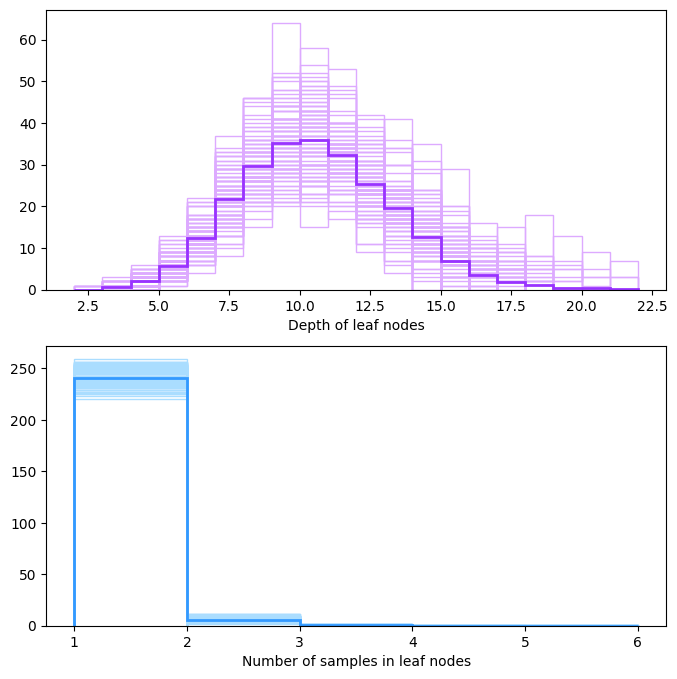

In [56]:
def draw_ensemble(ensemble):

     plt.figure(figsize=(8,8))
     plt.subplot(211)

     depths_all = np.array([], dtype=int)

     for x in ensemble.estimators_:
         tree = x.tree_
         depths = leaf_depths(tree)
         depths_all = np.append(depths_all, depths)
         plt.hist(depths, histtype='step', color='#ddaaff', 
                  bins=range(min(depths), max(depths)+1))

     plt.hist(depths_all, histtype='step', color='#9933ff', 
              bins=range(min(depths_all), max(depths_all)+1), 
              weights=np.ones(len(depths_all))/len(ensemble.estimators_), 
              linewidth=2)
     plt.xlabel("Depth of leaf nodes")
    
     samples_all = np.array([], dtype=int)
    
     plt.subplot(212)
    
     for x in ensemble.estimators_:
         tree = x.tree_
         samples = leaf_samples(tree)
         samples_all = np.append(samples_all, samples)
         plt.hist(samples, histtype='step', color='#aaddff', 
                  bins=range(min(samples), max(samples)+1))
    
     plt.hist(samples_all, histtype='step', color='#3399ff', 
              bins=range(min(samples_all), max(samples_all)+1), 
              weights=np.ones(len(samples_all))/len(ensemble.estimators_), 
              linewidth=2)
     plt.xlabel("Number of samples in leaf nodes")
    
     plt.show()
        
draw_ensemble(random_forest_boston)



## Boosting
+ Boosting can be used (like bagging) for many different learning algorithms. 
+ Trees are grown sequentially. Each tree is grown using information from a previous tree. 
+ Boosting learns slowly. A tree is fit to the *residuals* of the model and not the outcome Y. 
+ Each tree can be small with just a few terminal nodes. 
+ The new trees keep focusing on areas where the model performs poorly. 
+ For classification problems the log-odds are used to find the residuals.

Parameters to model, 
* B - the number of trees to fit
* d - the max number of terminal nodes for each tree
* $\lambda$ - learning (shrinkage) parameter that determines how much weight to assign to each tree. It control the speed of the process. (0.01 or 0.001)

Add up all trees (times $\lambda$) together to get final model.
$$\hat{f}(x) = \sum_{b=1}^B{\lambda \hat{f}^b(x)}$$

### Ensemble of weak learners
Random forest and Boosted trees are two excellent algorithms that both use 'weak' learners. On their own each learner is quite terrible but when combined together with many, make them very powerful, more powerful than an expert in many cases.

In [ ]:
Image('images/pw811.png', width =600)

### Lab: Boosting

Now we'll use the `GradientBoostingRegressor` package to fit **boosted
regression trees** to the `Boston` data set. The
argument `n_estimators = 500` indicates that we want 500 trees, and the option
`interaction.depth = 4` limits the depth of each tree:

In [57]:
boosted_boston = GradientBoostingRegressor(n_estimators = 500, 
                                           learning_rate = 0.01, 
                                           max_depth = 4, 
                                           random_state = 1)

boosted_boston.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          random_state=1)

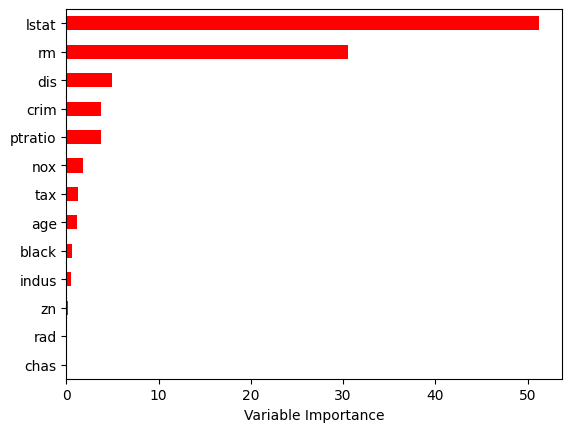

In [58]:
## Let's check out the feature importances again:

feature_importance = boosted_boston.feature_importances_*100

rel_imp = pd.Series(feature_importance, 
                    index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', 
               color = 'r', )

plt.xlabel('Variable Importance')

plt.gca().legend_ = None

We see that `lstat` and `rm` are again the most important variables by far. Now let's use the boosted model to predict `medv` on the test set:

In [59]:
mean_squared_error(y_test, boosted_boston.predict(X_test))

19.046377762502416

The test MSE obtained is similar to the test MSE for random forests
and superior to that for bagging. If we want to, we can perform boosting
with a different value of the shrinkage parameter $\lambda$. Here we take $\lambda = 0.2$:

In [60]:
boosted_boston2 = GradientBoostingRegressor(n_estimators = 500, 
                                            learning_rate = 0.2, 
                                            max_depth = 4, 
                                            random_state = 1)
boosted_boston2.fit(X_train, y_train)

mean_squared_error(y_test, boosted_boston2.predict(X_test))

17.667086952596446

In this case, using $\lambda = 0.2$ leads to a slightly lower test MSE than $\lambda = 0.01$.


<h1> Extra reference </h1>

# Leo Breiman - Random Forest Creator
Excellent site and a fairly easy read: https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

# Extreme Gradient Boosting (XGBoost)
Winner of many kaggle competitions: See explanation of algorithm here: http://xgboost.readthedocs.io/en/latest/model.html#

# Extremely Random Trees
Random forests where only a random subset of the cutpoints are allowed. Choose the best cutpoint from that random set. http://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees

# Exercises

1. statistician or data scientist

            do you like measure theory
           /                          \
          yes                          no
          /                             \
        statistician                   would you like to code for more than 4 hours each day
                                       /            \
                                     yes            no
                                     /               \
       taken more than 5 machine learning courses?   statistician  
       /                              \
       yes                           no
       /                              \
       do you like big data?           are you a frequentist?
       /              \                       /          \
       yes            no                     yes          no
       |               |                      |            |
       data scientist  stats              statistician   data scientist

# 2. 
A sum of one depth trees are basis functions with indicator variables and a sum of basis functions is an additive model.

# 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#3
p1 = np.linspace(0.001, .9999, 1000)
p2 = 1 - p1

In [ ]:
classification_error = 1 - np.column_stack((p1, p2)).max(axis=1)
gini = p1 * (1 - p1) + p2 * (1 - p2)
entropy = -(p1 * np.log(p1) + p2 * np.log(p2))

In [ ]:
plt.plot(p1, classification_error)
plt.plot(p1, gini)
plt.plot(p1, entropy);

# 4a
      x1 > 1
       /  \
     x2 > 1  5
     /     \  
    x1 < 0  15 
    /      \
    x2>.5   3
    /   \
    0   10

# 4b

In [ ]:
plt.xlim(-1, 2)
plt.ylim(0, 3)
plt.hlines(1, -1, 2)
plt.vlines(1, 0, 1)
plt.hlines(2, -1, 2)
plt.vlines(0, 2, 3)
plt.text(-.3, .4, "-1.8", fontsize=30)
plt.text(1.3, .4, ".63", fontsize=30)
plt.text(.3, 1.4, "2.49", fontsize=30)
plt.text(-.8, 2.4, "-1.06", fontsize=30)
plt.text(.7, 2.4, ".21", fontsize=30);

 # 5
 Majority vote: Choose Red     
 Non-red: 4 votes  
 red: 6 votes  
 

#### average probability
choose green (.45)

In [ ]:
# average Probability Choose green
np.mean([.1, .15, .2, .2, .55, .6, .6,.65, .7, .75])

# 6
For a regression tree, look through each feature and for each feature split the feature in two parts for each unique value of that feature and calcaulate RSS. Choose first split with lowest RSS. 

Now you have two nodes, repeat procedure until only a set number of observations are left in each node

# 7

In [ ]:
import pandas as pd
boston = pd.read_csv('data/boston.csv')

In [ ]:
boston.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = boston.iloc[:, :-1]
y = boston['medv']

In [ ]:
from collections import defaultdict

In [ ]:
max_features_dict = defaultdict(list)

In [ ]:
max_features = range(1, X.shape[1] + 1)
num_trees = [5, 10, 20, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

In [ ]:
for mf in max_features:
    for nm in num_trees:
        clf = RandomForestRegressor(oob_score=True, max_features=mf, n_estimators=nm)
        clf.fit(X, y)
        max_features_dict[mf].append(clf.oob_score_)

In [ ]:
plt.figure(figsize=(18,12))
for mf, values in max_features_dict.items():
    plt.plot(num_trees[:5], values[:5], label=mf)
plt.legend(loc=4)

In [ ]:
plt.figure(figsize=(18,12))
for mf, values in max_features_dict.items():
    plt.plot(num_trees[6:10], values[6:10], label=mf)
plt.legend(loc=4)

In [ ]:
plt.figure(figsize=(18,12))
for mf, values in max_features_dict.items():
    plt.plot(num_trees[11:], values[11:], label=mf)
plt.legend(loc=4)

# Conclusion
Not much difference in R-squared after 20 trees and at least 3 predictor variables used at each node

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [ ]:
clf = DecisionTreeRegressor()

In [ ]:
carseats = pd.read_csv('data/carseats.csv')

In [ ]:
carseats.head()

In [ ]:
carseats = pd.get_dummies(carseats, drop_first=True)

In [ ]:
carseats.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = carseats.iloc[:, 1:]
y = carseats['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
from IPython.display import Image

In [ ]:
from sklearn.externals.six import StringIO  

In [ ]:
import pydot
dot_data = StringIO()

In [ ]:
export_graphviz(clf, out_file=dot_data)

In [ ]:
dot_data

In [ ]:
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_png("images/carseats_tree.png") 

![image](images/carseats_tree.png)